### **Importing Libraries**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor,VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score

### **Load the Dataset**

In [31]:
df = pd.read_csv("data\car details.csv")

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\kevin\AppData\Local\Temp\ipykernel_41628\4167863028.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("data\car details.csv")


### **Feature Selection and Target**

In [32]:
#df = df.drop(columns=['Customer_ID'])

In [33]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


### DEALING WITH NANs

In [34]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values:\n", missing_percentage)

Percentage of Missing Values:
 Make                  0.000000
Model                 0.000000
Price                 0.000000
Year                  0.000000
Kilometer             0.000000
Fuel Type             0.000000
Transmission          0.000000
Location              0.000000
Color                 0.000000
Owner                 0.000000
Seller Type           0.000000
Engine                3.885381
Max Power             3.885381
Max Torque            3.885381
Drivetrain            6.605148
Length                3.108305
Width                 3.108305
Height                3.108305
Seating Capacity      3.108305
Fuel Tank Capacity    5.488101
dtype: float64


- #### **Numerical Columns:**
    - Use mean, median, or mode to fill missing values.
    - For skewed data, the median is a better choice.

In [35]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

- #### **Categorical Columns:**
    - Replace missing values with the mode or a placeholder value like 'Unknown'.

In [36]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [37]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values:\n", missing_percentage)

Percentage of Missing Values:
 Make                  0.0
Model                 0.0
Price                 0.0
Year                  0.0
Kilometer             0.0
Fuel Type             0.0
Transmission          0.0
Location              0.0
Color                 0.0
Owner                 0.0
Seller Type           0.0
Engine                0.0
Max Power             0.0
Max Torque            0.0
Drivetrain            0.0
Length                0.0
Width                 0.0
Height                0.0
Seating Capacity      0.0
Fuel Tank Capacity    0.0
dtype: float64


In [38]:
df = df.drop(columns=['Model'])

In [39]:
X = df.drop(columns=['Price'])  
y = df['Price']  

In [40]:
X

,Make,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [41]:
y

0        505000
1        450000
2        220000
3        799000
4       1950000
         ...   
2054     850000
2055     275000
2056     240000
2057    4290000
2058     670000
Name: Price, Length: 2059, dtype: int64

In [42]:
y = y.astype('category').cat.codes

In [43]:
num_features = X.select_dtypes(exclude=['object']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [44]:
num_features

Index(['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity'],
      dtype='object')

In [45]:
cat_features.shape

(11,)

In [46]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScaler', numeric_transformer, num_features),
        ('OneHotEncoder', categorical_transformer, cat_features)
    ]
)

In [48]:
X = preprocessor.fit_transform(X)

In [49]:
X.shape

(2059, 890)

### **TRAIN TEST SPLIT**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1647, 890), (412, 890), (1647,), (412,))

### **MODEL EVALUATION**

In [51]:
def Evaluate_Model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2
    

In [52]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Bagging': BaggingRegressor(),
    'Voting': VotingRegressor(estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor())])
}

model_List = []
mae_List = []
mse_List = []
rmse_List = []
r2_List = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae, mse, rmse, r2 = Evaluate_Model(y_test, y_pred)
    model_List.append(name)
    mae_List.append(mae)
    mse_List.append(mse)
    rmse_List.append(rmse)
    r2_List.append(r2)
    print(f"{name} - \nMAE: {mae}, \nMSE: {mse}, \nRMSE: {rmse}, \nR2: {r2}")

Linear Regression - 
MAE: 26.6683584476787, 
MSE: 1785.808530604035, 
RMSE: 42.25882784228681, 
R2: 0.9331804575390654
Random Forest - 
MAE: 23.204755258899674, 
MSE: 1097.409264686691, 
RMSE: 33.127168075262496, 
R2: 0.9589382715436169
Decision Tree - 
MAE: 32.8252427184466, 
MSE: 2226.6844660194174, 
RMSE: 47.18775758625766, 
R2: 0.9166842163230331
Support Vector Machine - 
MAE: 80.50498561724054, 
MSE: 10920.750567880914, 
RMSE: 104.50239503418528, 
R2: 0.5913786143529212
K-Nearest Neighbors - 
MAE: 30.910679611650487, 
MSE: 1717.9099029126212, 
RMSE: 41.44767668896076, 
R2: 0.9357210183877309
Gradient Boosting - 
MAE: 26.259159492737787, 
MSE: 1339.5642016272961, 
RMSE: 36.60005739923499, 
R2: 0.9498775677706571
AdaBoost - 
MAE: 46.164861641634374, 
MSE: 3284.5452780983055, 
RMSE: 57.310952514317066, 
R2: 0.8771022710925692
Extra Trees - 
MAE: 21.623228155339802, 
MSE: 906.5505036407767, 
RMSE: 30.108977127109064, 
R2: 0.9660796278924049
Bagging - 
MAE: 24.947443365695793, 
MSE: 13

## **RESULTS**

In [53]:
print(len(model_List), len(mae_List), len(mse_List), len(rmse_List), len(r2_List))

10 10 10 10 10


In [54]:
results = pd.DataFrame({'Model': model_List, 'MAE': mae_List , 'MSE': mse_List, 'RMSE': rmse_List, 'R2': r2_List})


In [55]:
results.sort_values(by='R2', ascending=False)

,Model,MAE,MSE,RMSE,R2
7,Extra Trees,21.623228,906.550504,30.108977,0.966080
9,Voting,20.911398,947.081287,30.774686,0.964563
1,Random Forest,23.204755,1097.409265,33.127168,0.958938
8,Bagging,24.947443,1315.216288,36.265911,0.950789
5,Gradient Boosting,26.259159,1339.564202,36.600057,0.949878
4,K-Nearest Neighbors,30.910680,1717.909903,41.447677,0.935721
0,Linear Regression,26.668358,1785.808531,42.258828,0.933180
2,Decision Tree,32.825243,2226.684466,47.187758,0.916684
6,AdaBoost,46.164862,3284.545278,57.310953,0.877102
3,Support Vector Machine,80.504986,10920.750568,104.502395,0.591379


## **Using AdaBoost Model**

In [56]:
Voting = VotingRegressor(estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor())])
Voting.fit(X_train, y_train)
y_pred = Voting.predict(X_test)
mae, mse, rmse, r2 = Evaluate_Model(y_test, y_pred)
print(f"AdaBoost - \nMAE: {mae}, \nMSE: {mse}, \nRMSE: {rmse}, \nR2: {r2}")

AdaBoost - 
MAE: 20.874665627272442, 
MSE: 945.598471939304, 
RMSE: 30.75058490401937, 
R2: 0.9646185712723796


### PLOT Y_PRED AND Y_TEST

In [57]:
y_pred.max(), y_pred.min()

(634.5162991079831, -11.748590569581204)

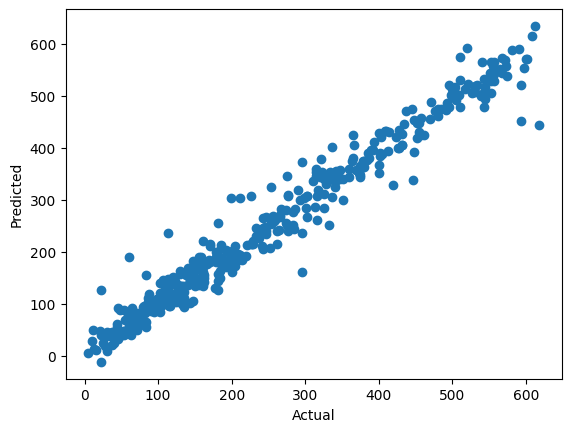

In [58]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()